In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from senticnet.senticnet import SenticNet
import statistics
import textblob
import spacy
import math
import re, string

In [11]:
comments = pd.read_csv('./comment-assets/newman-old.csv')
comments.head()
sn = SenticNet()

In [12]:
clean_comments = []
gaps = [' ', ',', '.']

for idx, comment in comments.iterrows():
    clean_comment = ''
    for character in str(comment['commentText']):
        pattern = re.compile('[\W_]+')
        if character in pattern.sub('', string.printable) or character in gaps:
            clean_comment += character
    clean_comments.append(clean_comment)
    
len(clean_comments)

56910

In [9]:
# Tokenize all comments and add to main dataframe

tokenized_comments = []
count = 0
tokenizer = spacy.load('en')

for comment in clean_comments:
    tokens_list = []
    # Break comments into tokens
    tokens = tokenizer(str(comment))
    for token in tokens:
        if not token.is_punct or not token.is_stop:
            tokens_list.append(token)
    # tokens_list.append(tokens for token in tokens if not token.is_punct or token.is_stop)
    # above line of code changes token to generator object???
    
    tokenized_comments.append(tokens_list)
    
    count += 1
    if count % 5000 == 0:
        print(count)
    
len(tokenized_comments)

NameError: name 'clean_comments' is not defined

In [251]:
comments['Tokenized'] = pd.Series(tokenized_comments)

In [252]:
comment_polarities = []

for idx, comment in comments.iterrows():
    token_polarities = []
    # print(str(comments['Tokenized'][idx]))
    #if idx <= 5000:
    for token in comments['Tokenized'][idx]:
        try:
            token_polarities.append(float(sn.polarity_intense(str(token))))
        except Exception as e:
            pass
    if not math.isnan(np.mean(token_polarities)): 
        comment_polarities.append(np.mean(token_polarities))
        
comments['Comment Polarity'] = pd.Series(comment_polarities)

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### The Data Model Here, eh?

WHAT DO WE NEED TO ACCOMPLISH?

I need to be able to run all sorts of associative analytics on a set of tokens, i.e., a comment. Therefore, I need a table of comments — lists of tokens — with all the of that data associated with it.

Can a Pandas dataframe support this?

I need a list of tokens as a single column entry. Then, I need to be able to perform that while excluding all of the NaN-type errors that I'm hiding with my datatype manipulation in the function above...

Once I know that:
- Think of how we bring sentics/moodtags into this
- Break out distributions by keywords/mentions
- Perhaps even break out sentences? This is slightly ambitious, but arguably necessary to getting the full picture, e.g., "John is cool. Bob's an asshole." might come out neutral, but is actually the _most_ polar comment (just test this). 

(array([   468.,    358.,    521.,   1366.,   2732.,   7935.,  10797.,
          5972.,   1747.,   1110.]),
 array([-1.     , -0.80095, -0.6019 , -0.40285, -0.2038 , -0.00475,
         0.1943 ,  0.39335,  0.5924 ,  0.79145,  0.9905 ]),
 <a list of 10 Patch objects>)

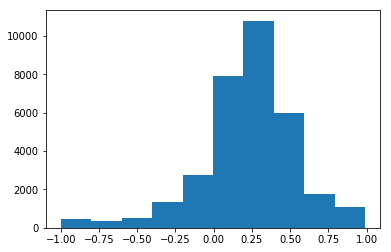

In [272]:
# plt.hist(comments['Comment Polarity'])
plt.hist(comment_polarities)

In [255]:
token_moodtags = []

for idx, comment in comments.iterrows():
    if idx <= 5000:
        for token in comments['Tokenized'][idx]:
            if not token.is_punct or token.is_stop:
                    try:
                        token_moodtags.append(sn.moodtags(str(token)))
                    except Exception as e:
                        pass
                    
comments['Token Moodtags'] = pd.Series(token_moodtags)

In [247]:
comments[0:10]

,id,user,date,timestamp,commentText,likes,hasReplies,numberOfReplies,replies.id,replies.user,replies.date,replies.timestamp,replies.commentText,replies.likes,Tokenized,Token Moodtags,Comment Polarity
0,UgxhWL_U704pCWNzCPx4AaABAg,Disruptive_Innovator,4 seconds ago,1.516661e+12,Yay Jordan B Peterson! MSM reporter was not s...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[Yay, Jordan, B, Peterson, , MSM, reporter, w...","[#joy, #interest]",0.805500
1,UgwVxKFqdpMMU-VbnS94AaABAg,Gol Gulok,8 seconds ago,1.516661e+12,Jordan Peterson on the Channel 4 Controversy: ...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[Jordan, Peterson, on, the, Channel, 4, Contro...","[#joy, #interest]",0.457750
2,Ugw4sP8JkF-9g1bGnFN4AaABAg,Bobby Smith,1 minute ago,1.516661e+12,"This woman must be a special type of stupid, c...",0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[This, woman, must, be, a, special, type, of, ...","[#joy, #admiration]",0.083900
3,UgyxXjOKQcC4pSlQogF4AaABAg,JoseitoEdlVodao,1 minute ago,1.516661e+12,Fact: The ability to think is regulated by you...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[Fact, The, ability, to, think, is, regulated,...","[#joy, #interest]",0.300098
4,Ugz8alNzq7xv5CTv6Od4AaABAg,Deividas Melnikas Shtaufer,2 minutes ago,1.516661e+12,Honestly there are 25 biologicaly and biochemi...,1.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[Honestly, there, are, 25, biologicaly, and, b...","[#joy, #interest]",0.126000
5,Ugw0gsQs9Oo-D3Wew114AaABAg,Yuyi Leal,2 minutes ago,1.516661e+12,Everyone should watch this clip ...You won't r...,1.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[Everyone, should, watch, this, clip, ..., You...","[#joy, #admiration]",0.226000
6,UgxwiqLXybCNi-5ljsd4AaABAg,Cool Guy,2 minutes ago,1.516661e+12,Gets Jordan Peterson in interview.\nGets 3 mil...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[Gets, Jordan, Peterson, in, interview, ., Get...","[#sadness, #anger]",0.131333
7,UgwCu-LL4OZIiZw8oN94AaABAg,Jeff Scott,2 minutes ago,1.516661e+12,After watching it a second time I have some re...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[After, watching, it, a, second, time, I, have...","[#interest, #admiration]",0.388000
8,UgxbJnvg_xIfQykCS094AaABAg,ian o'loughlin,3 minutes ago,1.516660e+12,I kinda feel sorry for her. She is either inte...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[I, kinda, feel, sorry, for, her, ., She, is, ...","[#sadness, #disgust]",0.304000
9,UgwJzSO_E6Vrbk1eCkN4AaABAg,TheEntityRaptor,3 minutes ago,1.516660e+12,I have never seen someone dominate an argument...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"[I, have, never, seen, someone, dominate, an, ...","[#interest, #admiration]",-0.464250


In [291]:
cathy_names = ['cathy']
cathies = []
cathy_polarities = []


for idx, comment in comments.iterrows():
    if 'cathy' in str(comments['commentText'][idx]):
        # print('found cathy! at ', idx)
        cathies.append(idx)
        
for cathy in cathies:
    comment_polarity = []
    for token in comments['Tokenized'][cathy]:
        try:
            comment_polarity.append(float(sn.polarity_intense(str(token))))
        except Exception as e:
            pass
    if not math.isnan(np.mean(comment_polarity)):
        cathy_polarities.append(np.mean(comment_polarity))

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(array([  2.,   1.,   0.,   3.,   4.,  10.,  25.,   8.,   6.,   2.]),
 array([-0.97  , -0.7857, -0.6014, -0.4171, -0.2328, -0.0485,  0.1358,
         0.3201,  0.5044,  0.6887,  0.873 ]),
 <a list of 10 Patch objects>)

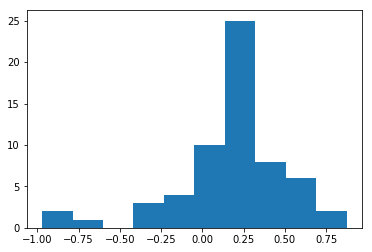

In [293]:
plt.hist(cathy_polarities)

(array([   468.,    358.,    521.,   1366.,   2732.,   7935.,  10797.,
          5972.,   1747.,   1110.]),
 array([-1.     , -0.80095, -0.6019 , -0.40285, -0.2038 , -0.00475,
         0.1943 ,  0.39335,  0.5924 ,  0.79145,  0.9905 ]),
 <a list of 10 Patch objects>)

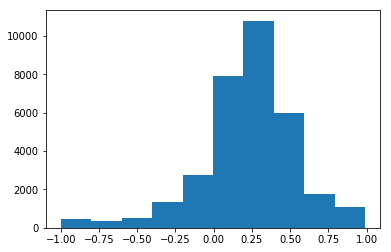

In [294]:
plt.hist(comments['Comment Polarity'].dropna())

In [1]:
comments.head()

NameError: name 'comments' is not defined

In [6]:
sn.moodtags('peterson')

KeyError: 'peterson'

In [8]:
np.array(comments)

array([['UgxhWL_U704pCWNzCPx4AaABAg', 'Disruptive_Innovator',
        '4 seconds ago', ..., nan, nan, nan],
       ['UgwVxKFqdpMMU-VbnS94AaABAg', 'Gol Gulok', '8 seconds ago', ...,
        nan, nan, nan],
       ['Ugw4sP8JkF-9g1bGnFN4AaABAg', 'Bobby Smith', '1 minute ago', ...,
        nan, nan, nan],
       ..., 
       [nan, nan, nan, ..., 1516490291444.0,
        "Scott McErlean she was using arguments that have clearly already been said. That isn't strawmaning.... even if those were actually strawman fallacies...\n\nAfter presenting the obvious and readily available arguments, she allowed jordan his points and listened honestly. Despite everything she never got boggled down on anything and a remarkable amount of topics were covered.\n\nbtw, quite the ridiculous strawman yourself.",
        0.0],
       ['Ugwyw8MgtyxVNExicUZ4AaABAg', 'Psycopathic cuntstable',
        '6 days ago', ..., nan, nan, nan],
       [nan, nan, nan, ..., 1516231090587.0, 'shill', 0.0]], dtype=object)

In [13]:
clean_comments[0:10]

['Yay Jordan B Peterson  MSM reporter was not so good.',
 'Jordan Peterson on the Channel 4 Controversy httpswww.youtube.comwatchvE6qBxnhFDQ This interview is fantastic, Peterson  nails the fallout from this car crash with his usual precision of thought, its a must see.',
 'This woman must be a special type of stupid, coupled with victim rage  painful to watch. How is she on TV',
 'Fact The ability to think is regulated by your emotions.Fact The more competent you are in a human hierarchy the better chance you have at regulation your emotions.Fact Egalitarianism doesnt let you become competent.Fact The ability to observe yourself and your own emotions demands that youre able to regulate them. Its a two way street.Fact If you want your emotions to be useful, you have to be able to observe them, therefore regulate them.Observation This woman seems like she can barely regulate her own emotions, very unlike Camille Paglia, a well known Feminist.',
 'Honestly there are 25 biologicaly and bi

In [ ]:
for all the comments:
    check if this word is in sentic library
        if so, add it to the list to be tokenized